In [2]:
from utils.datasets import *

train_set, test_set, train_set_mia, test_set_mia, dict_users, train_idxs, val_idxs, client_size_map = get_data(dataset="cifar100",
                                                        data_root = "../Data",
                                                        iid = 0,
                                                        num_users = 10,
                                                        data_aug=0,
                                                        noniid_beta=1.0,
                                                        save_path=123
                                                        )

/home/haken/.conda/envs/fedmia/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Files already downloaded and verified
The dataset is splited with non-iid param  1.0


In [ ]:
for client_id, class_map in client_size_map.items():
    print(class_map)

client_label_distribution = {
    client_id: {int(class_id): int(count) for class_id, count in class_map.items()}
    for client_id, class_map in client_size_map.items()
}

{0: 62, 1: 39, 2: 60, 3: 4, 4: 192, 5: 1, 6: 6, 7: 109, 8: 79, 9: 6, 10: 11, 11: 8, 12: 1, 13: 34, 14: 111, 15: 2, 16: 21, 17: 18, 18: 54, 19: 12, 20: 97, 21: 25, 22: 7, 23: 38, 24: 18, 25: 0, 26: 62, 27: 25, 28: 83, 29: 40, 30: 98, 31: 124, 32: 43, 33: 8, 34: 73, 35: 55, 36: 11, 37: 31, 38: 30, 39: 14, 40: 147, 41: 5, 42: 17, 43: 34, 44: 41, 45: 7, 46: 6, 47: 107, 48: 26, 49: 24, 50: 7, 51: 39, 52: 78, 53: 133, 54: 35, 55: 29, 56: 1, 57: 32, 58: 99, 59: 40, 60: 56, 61: 27, 62: 9, 63: 18, 64: 7, 65: 23, 66: 45, 67: 64, 68: 60, 69: 0, 70: 10, 71: 15, 72: 22, 73: 33, 74: 160, 75: 28, 76: 12, 77: 105, 78: 17, 79: 34, 80: 96, 81: 0, 82: 87, 83: 65, 84: 12, 85: 68, 86: 28, 87: 5, 88: 34, 89: 11, 90: 10, 91: 32, 92: 11, 93: 4, 94: 15, 95: 50, 96: 165, 97: 43, 98: 7, 99: 76}
{0: 146, 1: 83, 2: 128, 3: 26, 4: 59, 5: 102, 6: 30, 7: 6, 8: 36, 9: 156, 10: 22, 11: 6, 12: 2, 13: 138, 14: 20, 15: 134, 16: 53, 17: 216, 18: 12, 19: 2, 20: 26, 21: 169, 22: 15, 23: 49, 24: 107, 25: 137, 26: 88, 27: 19, 

/tmp/ipykernel_1529471/2681499168.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


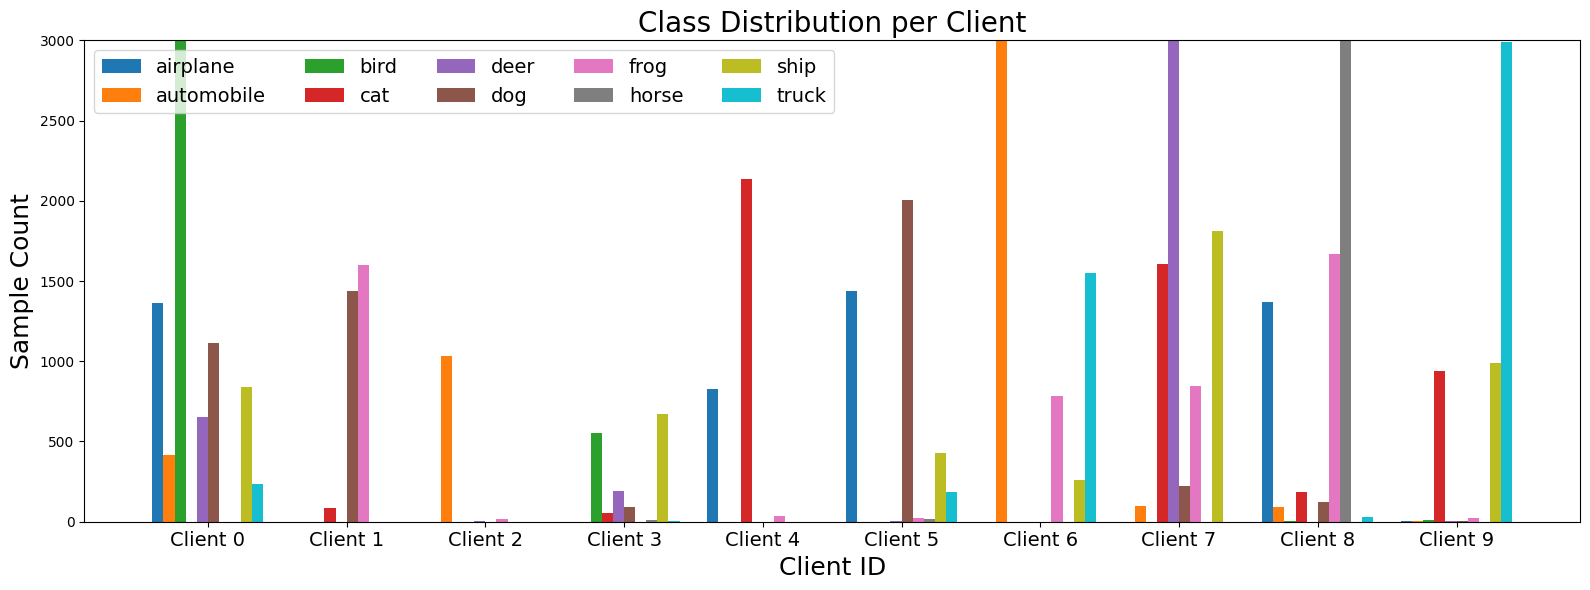

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 原始資料
noniid_bt = 0.1
with open(f'./result_fedmia/noniid/noniid_{noniid_bt}/cifar10_K10_N5000_ResNet18_IB_beta10.0_defnone_iid$0_${noniid_bt}_$adam_local1_s1/client_distribution.json', 'r', encoding='utf-8') as file:
    client_data = json.load(file)

num_clients = len(client_data)
num_classes = 10
bar_width = 0.08
x = np.arange(num_clients)  # 每個 client 的位置

y_max = 5000
y_min = 0
yticks = np.linspace(y_min, y_max, 5)


plt.figure(figsize=(16, 6))

# 顏色用 class 分（每類一色）
colors = plt.cm.get_cmap('tab10', num_classes)
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# 每個 class 畫一組 bar（在不同 client 上的高度）
for cls, y in enumerate(labels):
    counts = [client_data[str(client_id)][str(cls)] for client_id in range(num_clients)]
    plt.bar(x + cls * bar_width, counts, width=bar_width, label=y, color=colors(cls))

plt.xlabel("Client ID", fontsize=18)
plt.ylabel("Sample Count", fontsize=18)
plt.title("Class Distribution per Client", fontsize=20)
plt.xticks(x + (num_classes / 2 - 0.5) * bar_width, [f'Client {i}' for i in range(num_clients)], fontsize=14)
# plt.yticks(yticks, [f"{y}" for y in yticks], fontsize=14)
plt.ylim(0, 3000) 
# plt.yticks(fontsize=14)
plt.legend(ncol=5, fontsize=14)
plt.tight_layout()
plt.savefig(f'./plot_result/client_distribution_{noniid_bt}_3000.png', bbox_inches='tight')    
plt.show()


/tmp/ipykernel_3039440/2556581486.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


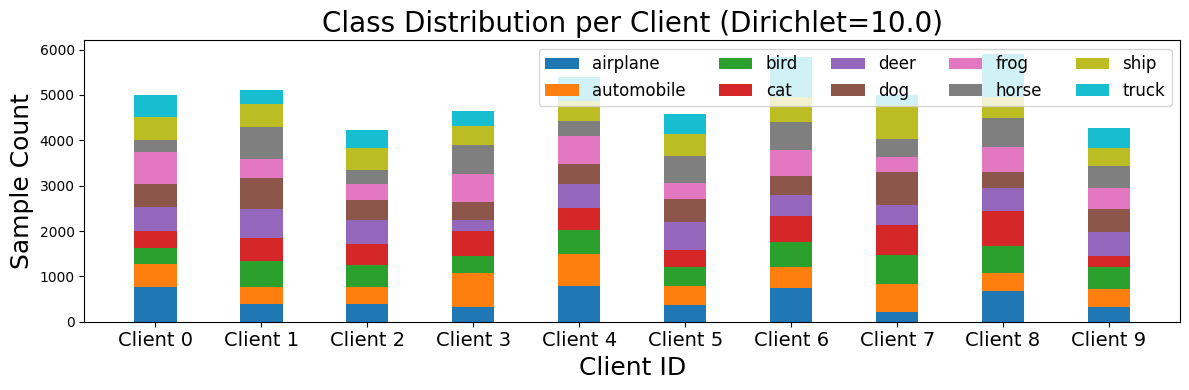

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import json

# ---------- 讀取資料 ----------
noniid_bt = 10.0
dataset = "cifar10"
with open(f'./result_fedmia/noniid/noniid_{noniid_bt}/{dataset}/'
          f'cifar10_K10_N5000_ResNet18_IB_beta10.0_defnone_iid$0_${noniid_bt}'
          f'_$adam_local1_s1/client_distribution.json', 'r', encoding='utf-8') as f:
    client_data = json.load(f)

num_clients = len(client_data)
num_classes = 10
x = np.arange(num_clients)          # 每個 client 的 x 位置
bar_width = 0.4                     # 一根柱子的寬度 (整根給同一個 client)

colors = plt.cm.get_cmap('tab10', num_classes)
labels = ["airplane", "automobile", "bird", "cat", "deer",
          "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(12, 4))

# ---------- 畫堆疊柱狀圖 ----------
bottom = np.zeros(num_clients)      # 每層柱子的“起始高度”
for cls, label in enumerate(labels):
    counts = [client_data[str(cid)][str(cls)] for cid in range(num_clients)]
    plt.bar(x, counts,
            bottom=bottom,         # 把這一層疊在前一層上面
            width=bar_width,
            label=label,
            color=colors(cls))
    bottom += counts                # 更新下一層的起始高度

# ---------- (若只想看總量) ----------
# totals = [sum(client_data[str(cid)].values()) for cid in range(num_clients)]
# plt.bar(x, totals, width=bar_width, color='steelblue')

# ---------- 標籤與格式 ----------
plt.xlabel("Client ID", fontsize=18)
plt.ylabel("Sample Count", fontsize=18)
plt.title(f"Class Distribution per Client (Dirichlet={noniid_bt})", fontsize=20)
plt.xticks(x, [f'Client {i}' for i in range(num_clients)], fontsize=14)
# plt.ylim(0, 5000)                   # 視資料量調整
plt.legend(ncol=5 ,loc="upper right", fontsize=12)
plt.tight_layout()

# 儲存與顯示
plt.savefig(f'./plot_result/client_distribution_stacked_{noniid_bt}.png', bbox_inches='tight')
plt.show()


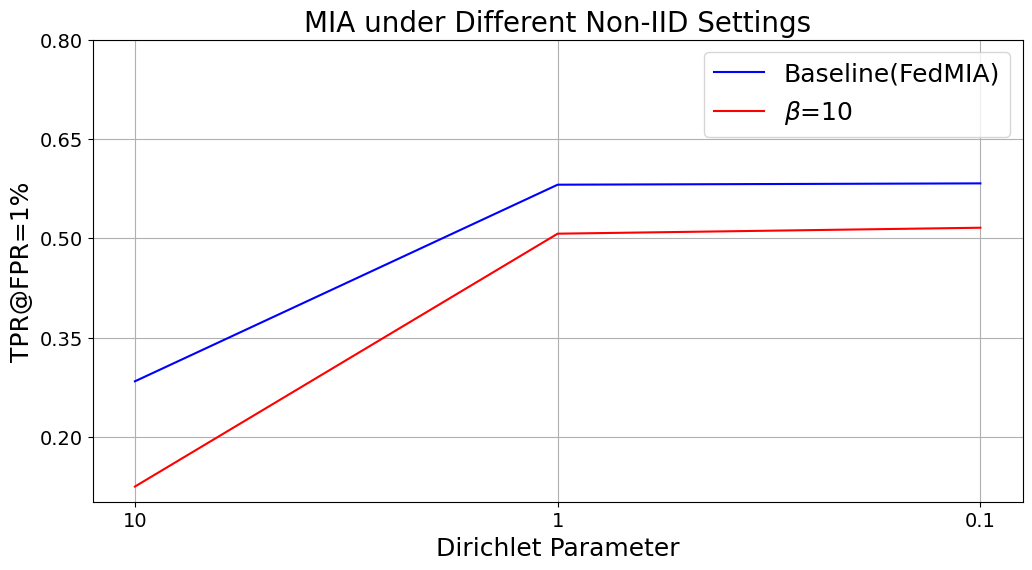

In [71]:
import matplotlib.pyplot as plt

label = ["10", "1", "0.1"]
y_max = 0.8
y_min = 0.2
yticks = np.linspace(y_min, y_max, 5)
# FedMIA
# lira      0.284, 0.581, 0.583
# lira_loss 0.150, 0.519, 0.602
FedMIA = [0.284, 0.581, 0.583]
beta = [0.125, 0.507, 0.516]
# beta
# lira      0.125, 0.507, 0.516
# lira_loss 0.116, 0.579, 0.545

# data = train_loss
# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(label, FedMIA, label="Baseline(FedMIA)", color="#0000FF")
plt.plot(label, beta, label=r"$\beta$=10", color="r")
# plt.plot(label, precision, label="Precision", color="#d62728")

# plt.plot(range(tol_epoch), rs_test_acc_beta_3[:tol_epoch], label="beta_2.0", color="#006400")
# plt.plot(range(tol_epoch), rs_test_acc_baseline[:tol_epoch], label="baseline", color="#FF0000")
# plt.axhline(y=0.5, alpha=0.5, color="#555555", linestyle="--")
plt.grid(True)
plt.xlabel("Dirichlet Parameter", fontsize=18)          # X軸標籤
plt.ylabel("TPR@FPR=1%", fontsize=18)          # Y軸標籤
plt.xticks(fontsize=14)  # X軸刻度字體
plt.yticks(yticks, [f"{y:.2f}" for y in yticks], fontsize=14)

plt.legend(fontsize=18)
plt.title("MIA under Different Non-IID Settings", fontsize=20)
plt.savefig('./plot_result/MIA_Attack_Results.png', bbox_inches='tight')          
plt.show()

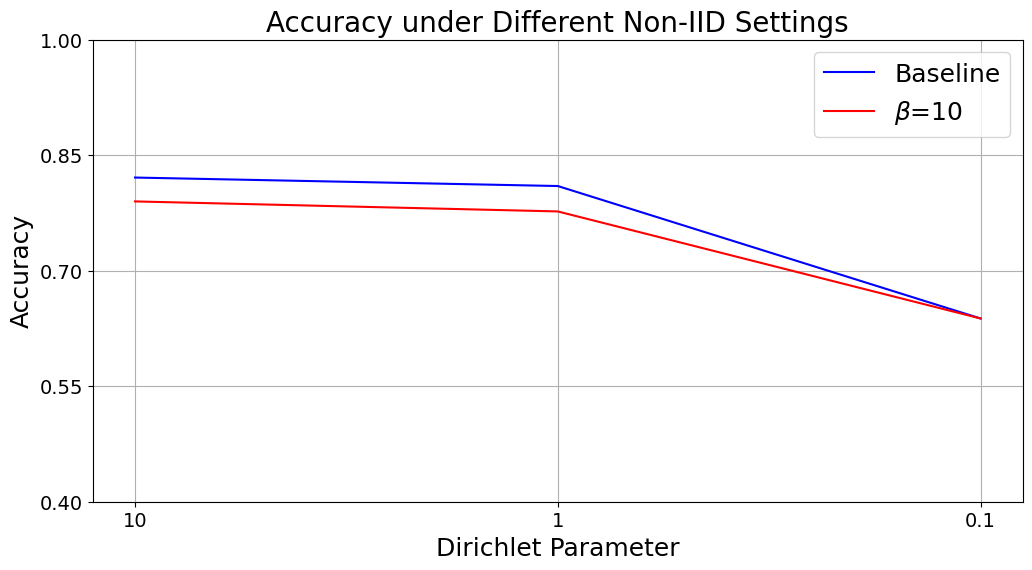

In [69]:
import matplotlib.pyplot as plt

label = ["10", "1", "0.1"]
y_max = 1.0
y_min = 0.4
yticks = np.linspace(y_min, y_max, 5)

FedMIA = [0.821, 0.810, 0.638]
beta = [0.790, 0.777, 0.638]
# data = train_loss
# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(label, FedMIA, label="Baseline", color="#0000FF")
plt.plot(label, beta, label=r"$\beta$=10", color="r")
# plt.plot(label, precision, label="Precision", color="#d62728")

# plt.plot(range(tol_epoch), rs_test_acc_beta_3[:tol_epoch], label="beta_2.0", color="#006400")
# plt.plot(range(tol_epoch), rs_test_acc_baseline[:tol_epoch], label="baseline", color="#FF0000")
# plt.axhline(y=0.5, alpha=0.5, color="#555555", linestyle="--")
plt.grid(True)
plt.xlabel("Dirichlet Parameter", fontsize=18)          # X軸標籤
plt.ylabel("Accuracy", fontsize=18)          # Y軸標籤
plt.xticks(fontsize=14)  # X軸刻度字體
plt.yticks(yticks, [f"{y:.2f}" for y in yticks], fontsize=14)

plt.legend(fontsize=18)
plt.title("Accuracy under Different Non-IID Settings", fontsize=20)
plt.savefig('./plot_result/MIA_Accuracy_Results.png', bbox_inches='tight')          
plt.show()

In [63]:
import json
import os
import numpy as np

# 原始資料
def read_result(dataset, def_method, model_name, iid, opt, noniid_bt=None, ib_beta=None):
    if iid:
        path = f"./result_fedmia/iid/{dataset}/{opt}/"
    else:
        path = f"./result_fedmia/noniid/{dataset}/"

    if model_name == "ResNet18_IB":
        if iid:
            with open(path + f'{dataset}_K10_N5000_{model_name}_beta1.0_defnone_iid$1_$1_${opt}_local1_s1/attack_score_0_none_n9_s2025_attack_id0.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)
        else:
            with open(path + f'noniid_{noniid_bt}/{dataset}_K10_N5000_{model_name}_beta10.0_defnone_iid$0_${noniid_bt}_${opt}_local1_s1/attack_score_1_outlier_n4_s2025.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)
    elif model_name in ["ResNet18_IB_Block", "ResNet18_IB_tail"]:
        if iid:
            with open(path + f'{dataset}_K10_N5000_{model_name}_beta{ib_beta}_defnone_iid$1_$1_${opt}_local1_s1/attack_score_0_none_n9_s2025_attack_id0.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)
        else:
            with open(path + f'noniid_{noniid_bt}/{dataset}_K10_N5000_{model_name}_beta{ib_beta}_defnone_iid$0_${noniid_bt}_${opt}_local1_s1/attack_score_1_outlier_n4_s2025.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)

    else:
        if iid:
            with open(path + f'{dataset}_K10_N5000_{model_name}_def{def_method}_iid$1_$1_${opt}_local1_s1/attack_score_0_none_n9_s2025_attack_id0.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)
        else:
            with open(path + f'noniid_{noniid_bt}/{dataset}_K10_N5000_{model_name}_def{def_method}_iid$0_${noniid_bt}_${opt}_local1_s1/attack_score_1_outlier_n4_s2025.log', 'r', encoding='utf-8') as file:
                client_data = json.load(file)
    
    return client_data

def read_acc(dataset, def_method, model_name, iid, opt, noniid_bt=None, ib_beta=None):

    if iid:
        path = f"./result_fedmia/iid/{dataset}/{opt}/"
    else:
        path = f"./result_fedmia/noniid/noniid_{noniid_bt}/{dataset}/{opt}/"
    
    if model_name == "ResNet18_IB":
        if iid:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_beta1.0_defnone_iid$1_$1_${opt}_local1_s1/"
        else:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_beta1.0_defnone_iid$0_${noniid_bt}_${opt}_local1_s1/"
    elif model_name in ["ResNet18_IB_Block", "ResNet18_IB_tail"]:
        if iid:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_beta{ib_beta}_defnone_iid$1_$1_${opt}_local1_s1/"
        else:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_beta{ib_beta}_defnone_iid$0_${noniid_bt}_${opt}_local1_s1/"
    else:
        if iid:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_def{def_method}_iid$1_$1_${opt}_local1_s1/"
        else:
            folder_path = path + f"{dataset}_K10_N5000_{model_name}_def{def_method}_iid$0_${noniid_bt}_${opt}_local1_s1/"
    # 指定檔案名稱模式（例如：以 data 開頭、.txt 結尾的檔案）
    pattern = f'a_{model_name}_{dataset}_10_{opt}_cosine'

    client_data = []
    for filename in os.listdir(folder_path):
        if pattern in filename:
            # print(filename)
            with open(folder_path + filename, 'r', encoding='utf-8') as file:
                for line in file:
                    client_data.append(json.loads(line)["test_acc"])

            top_5 = sorted(client_data, reverse=True)[:5]
            avg_top_5 = np.mean(top_5)
            # acc = max(client_data)

    
    return avg_top_5

In [59]:
dataset = "cifar100"
defense_methods = ["none", "mix_up", "instahide", "sparse", "dp"]
# def_method = "none" # defense methods = ["none", "mix_up", "instahide", "quant", "sparse"]
model_name = "ResNet18" # models = ["ResNet18", "ResNet18_IB"]
ib_beta = [1e-5, 1e-6, 1e-7]

opt = "sgd"
iid = 1
noniid_bt = 10.0

for defense in defense_methods:
    print(f"Dataset {dataset}, model {model_name}, optimizer {opt}, defense {defense}")
    try:
        client_data = read_result(dataset, defense, model_name, iid, opt)
    except:
        print("file read error")
        continue
    for i in client_data["avg_d"]:
        data = client_data["avg_d"][i]["0.001"]
        # print("0.01")
        print(f"{i} : {data:.3f}", end="   ")
    print("")

# print(f"Dataset {dataset}, model ResNet18_IB, optimizer {opt}, defense IB")
# client_data = read_result(dataset, "none", "ResNet18_IB", iid, opt)
# for i in client_data["avg_d"]:
#     data = client_data["avg_d"][i]["0.001"]
#     # print("0.01")
#     print(f"{i} : {data:.3f}", end="   ")
# print("")

# print(f"Dataset {dataset}, model ResNet18_IB, optimizer {opt}, defense IB_Block")
# client_data = read_result(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=1e-6)
# for i in client_data["avg_d"]:
#     data = client_data["avg_d"][i]["0.001"]
#     # print("0.01")
#     print(f"{i} : {data:.3f}", end="   ")
# print("")

Dataset cifar100, model ResNet18, optimizer sgd, defense none
cosine attack : 0.595   grad diff : 0.256   loss based : 0.269   grad norm : 0.000   lira : 0.702   lira_loss : 0.695   log_lira : 0.003   
Dataset cifar100, model ResNet18, optimizer sgd, defense mix_up
cosine attack : 0.188   grad diff : 0.251   loss based : 0.300   grad norm : 0.186   lira : 0.206   lira_loss : 0.199   log_lira : 0.013   
Dataset cifar100, model ResNet18, optimizer sgd, defense instahide
cosine attack : 0.233   grad diff : 0.339   loss based : 0.200   grad norm : 0.140   lira : 0.268   lira_loss : 0.300   log_lira : 0.033   
Dataset cifar100, model ResNet18, optimizer sgd, defense sparse
cosine attack : 0.628   grad diff : 0.256   loss based : 0.269   grad norm : 0.000   lira : 0.741   lira_loss : 0.677   log_lira : 0.004   
Dataset cifar100, model ResNet18, optimizer sgd, defense dp
cosine attack : 0.000   grad diff : 0.024   loss based : 0.012   grad norm : 0.075   lira : 0.001   lira_loss : 0.000   log

In [20]:
dataset = "cifar100"
defense_methods = ["none", "mix_up", "instahide", "sparse"]
# def_method = "none" # defense methods = ["none", "mix_up", "instahide", "quant", "sparse"]
model_name = "ResNet18" # models = ["ResNet18", "ResNet18_IB", "ResNet18_IB_Block"]
iid = 1
noniid_bt = 10.0
opt = "sgd"

for defense in defense_methods:
    print(f"Dataset {dataset}, model {model_name}, defense {defense}")
    client_data = read_result(dataset, defense, model_name, iid, opt)
    for i in client_data["other_scores"]:
        if i == "loss_single_epch_score":
            continue
        data = client_data["other_scores"][i][0]
        # print("0.01")
        print(f"{i} : {data:.3f}", end="   ")
    print("")

print(f"Dataset {dataset}, model ResNet18_IB, defense IB")
client_data = read_result(dataset, "none", "ResNet18_IB", iid, opt)
for i in client_data["other_scores"]:
    if i == "loss_single_epch_score":
            continue
    data = client_data["other_scores"][i][0]
    # print("0.01")
    print(f"{i} : {data:.3f}", end="   ")
print("")

print(f"Dataset {dataset}, model ResNet18_IB, defense IB_Block")
client_data = read_result(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=1e-6)
for i in client_data["other_scores"]:
    if i == "loss_single_epch_score":
            continue
    data = client_data["other_scores"][i][0]
    # print("0.01")
    print(f"{i} : {data:.3f}", end="   ")
print("")

Dataset cifar100, model ResNet18, defense none
loss_single_auc : 0.724   lira_auc : 0.911   lira_loss_auc : 0.910   log_lira_auc : 0.076   cos_attack_auc : 0.881   grad_diff_auc : 0.639   grad_norm_auc : 0.362   loss_based_auc : 0.707   
Dataset cifar100, model ResNet18, defense mix_up
loss_single_auc : 0.523   lira_auc : 0.690   lira_loss_auc : 0.691   log_lira_auc : 0.291   cos_attack_auc : 0.676   grad_diff_auc : 0.536   grad_norm_auc : 0.464   loss_based_auc : 0.510   
Dataset cifar100, model ResNet18, defense instahide
loss_single_auc : 0.515   lira_auc : 0.601   lira_loss_auc : 0.623   log_lira_auc : 0.319   cos_attack_auc : 0.588   grad_diff_auc : 0.612   grad_norm_auc : 0.388   loss_based_auc : 0.452   
Dataset cifar100, model ResNet18, defense sparse
loss_single_auc : 0.732   lira_auc : 0.910   lira_loss_auc : 0.905   log_lira_auc : 0.078   cos_attack_auc : 0.887   grad_diff_auc : 0.634   grad_norm_auc : 0.366   loss_based_auc : 0.702   
Dataset cifar100, model ResNet18_IB, de

In [25]:
dataset = "cifar100"
defense_methods = ["none", "mix_up", "instahide", "sparse"]
# def_method = "none" # defense methods = ["none", "mix_up", "instahide", "quant", "sparse"]
model_name = "ResNet18" # models = ["ResNet18", "ResNet18_IB"]
iid = 1
noniid_bt = 10.0
opt = "sgd"

for defense in defense_methods:
    print(f"Dataset {dataset}, model {model_name}, defense {defense}")
    acc = read_acc(dataset, defense, model_name, iid, opt)
    print(f"{acc:.3f}")

print(f"Dataset {dataset}, model ResNet18_IB, defense IB")
acc = read_acc(dataset, "none", "ResNet18_IB", iid, opt)
print(f"{acc:.3f}")

print(f"Dataset {dataset}, model ResNet18_IB, defense IB_Block")
acc = read_acc(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=1e-6)
print(f"{acc:.3f}")

Dataset cifar100, model ResNet18, defense none
0.419
Dataset cifar100, model ResNet18, defense mix_up
0.392
Dataset cifar100, model ResNet18, defense instahide
0.106
Dataset cifar100, model ResNet18, defense sparse
0.418
Dataset cifar100, model ResNet18_IB, defense IB
0.475
Dataset cifar100, model ResNet18_IB, defense IB_Block
0.527


In [67]:
dataset = "cifar100"
opt = "sgd"
ib_bt = [1e-6, 1e-5, 1e-4]

# print(f"Dataset {dataset}, model ResNet18_IB, optimizer {opt}, defense IB_Block")
# client_data = read_result(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=1e-6)
# for i in client_data["avg_d"]:
#     data = client_data["avg_d"][i]["0.001"]
#     # print("0.01")
#     print(f"{i} : {data:.3f}", end="   ")
# print("")

for bt in ib_bt:
    print(f"model ResNet18_IB, beta = {bt}, defense IB_tail")
    acc = read_acc(dataset, "none", "ResNet18_IB_tail", iid, opt, ib_beta=bt)
    client_data = read_result(dataset, "none", "ResNet18_IB_tail", iid, opt, ib_beta=bt)
    for i in client_data["avg_d"]:
        data = client_data["avg_d"][i]["0.001"]
        # print("0.01")
        print(f"{i} : {data:.3f}", end="   ")
    # for i in client_data["other_scores"]:
    #     if i == "loss_single_epch_score":
    #             continue
    #     data = client_data["other_scores"][i][0]
    #     # print("0.01")
    #     print(f"{i} : {data:.3f}", end="   ")
    print(f"acc: {acc:.3f}")

print("="*60)

for bt in ib_bt:
    print(f"model ResNet18_IB, beta = {bt}, defense IB_Block")
    acc = read_acc(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=bt)
    client_data = read_result(dataset, "none", "ResNet18_IB_Block", iid, opt, ib_beta=bt)
    for i in client_data["avg_d"]:
        data = client_data["avg_d"][i]["0.001"]
        # print("0.01")
        print(f"{i} : {data:.3f}", end="   ")
    # for i in client_data["other_scores"]:
    #     if i == "loss_single_epch_score":
    #             continue
    #     data = client_data["other_scores"][i][0]
    #     # print("0.01")
    #     print(f"{i} : {data:.3f}", end="   ")
    print(f"acc: {acc:.3f}")

model ResNet18_IB, beta = 1e-06, defense IB_tail
cosine attack : 0.084   grad diff : 0.090   loss based : 0.128   grad norm : 0.000   lira : 0.708   lira_loss : 0.663   log_lira : 0.000   acc: 0.501
model ResNet18_IB, beta = 1e-05, defense IB_tail
cosine attack : 0.038   grad diff : 0.105   loss based : 0.127   grad norm : 0.000   lira : 0.732   lira_loss : 0.695   log_lira : 0.004   acc: 0.500
model ResNet18_IB, beta = 0.0001, defense IB_tail
cosine attack : 0.018   grad diff : 0.087   loss based : 0.159   grad norm : 0.004   lira : 0.405   lira_loss : 0.382   log_lira : 0.041   acc: 0.505
model ResNet18_IB, beta = 1e-06, defense IB_Block
cosine attack : 0.109   grad diff : 0.157   loss based : 0.223   grad norm : 0.083   lira : 0.233   lira_loss : 0.505   log_lira : 0.007   acc: 0.527
model ResNet18_IB, beta = 1e-05, defense IB_Block
cosine attack : 0.012   grad diff : 0.084   loss based : 0.315   grad norm : 0.031   lira : 0.051   lira_loss : 0.586   log_lira : 0.001   acc: 0.496
mo

In [1]:
import numpy as np
import json

def compute_C1(class_counts):
    class_counts = [c for c in class_counts if c > 0]
    total = sum(class_counts)
    if total == 0 or len(class_counts) <= 1:
        return 1.0
    probs = [c / total for c in class_counts]
    entropy = -sum([p * np.log(p) for p in probs])
    norm_entropy = entropy / np.log(len(class_counts))
    return 1 - norm_entropy

def compute_C2(class_counts):
    class_counts = [c for c in class_counts if c > 0]
    n_c = len(class_counts)
    n = sum(class_counts)
    if n_c <= 1 or n == 0:
        return 1.0
    ir = 0
    for c_i in class_counts:
        if n - c_i == 0:
            continue
        ir += c_i / (n - c_i)
    ir *= (n_c - 1) / n_c
    if ir <= 1:
        return 0.0
    return 1 - 1 / ir

# 載入你的資料
fl_data = {
    "0": { "0": 1362, "1": 417, "2": 4433, "3": 0, "4": 653, "5": 1115, "6": 0, "7": 0, "8": 841, "9": 237 },
    "1": { "0": 0, "1": 0, "2": 0, "3": 84, "4": 0, "5": 1440, "6": 1602, "7": 0, "8": 0, "9": 0 },
    "2": { "0": 0, "1": 1030, "2": 0, "3": 0, "4": 2, "5": 0, "6": 19, "7": 0, "8": 0, "9": 0 },
    "3": { "0": 0, "1": 0, "2": 552, "3": 53, "4": 189, "5": 92, "6": 0, "7": 12, "8": 674, "9": 6 },
    "4": { "0": 828, "1": 0, "2": 0, "3": 2133, "4": 0, "5": 0, "6": 34, "7": 0, "8": 1, "9": 0 },
    "5": { "0": 1435, "1": 0, "2": 0, "3": 0, "4": 3, "5": 2004, "6": 22, "7": 14, "8": 430, "9": 187 },
    "6": { "0": 1, "1": 3365, "2": 0, "3": 0, "4": 1, "5": 0, "6": 783, "7": 0, "8": 258, "9": 1550 },
    "7": { "0": 0, "1": 96, "2": 1, "3": 1605, "4": 4149, "5": 221, "6": 848, "7": 0, "8": 1809, "9": 0 },
    "8": { "0": 1371, "1": 89, "2": 5, "3": 184, "4": 0, "5": 124, "6": 1668, "7": 4973, "8": 0, "9": 32 },
    "9": { "0": 3, "1": 3, "2": 9, "3": 941, "4": 3, "5": 4, "6": 24, "7": 1, "8": 987, "9": 2988 }
}

# 計算 C1, C2
print(f"{'Client':<7} {'C1':>8} {'C2':>8}")
for client_id, class_dist in fl_data.items():
    counts = list(class_dist.values())
    c1 = compute_C1(counts)
    c2 = compute_C2(counts)
    print(f"{client_id:<7} {c1:>8.4f} {c2:>8.4f}")

Client        C1       C2
0         0.2087   0.2380
1         0.2747   0.2240
2         0.9051   0.9694
3         0.3202   0.2364
4         0.5305   0.5347
5         0.4103   0.3025
6         0.3981   0.3500
7         0.3004   0.2412
8         0.4488   0.4060
9         0.5657   0.4457


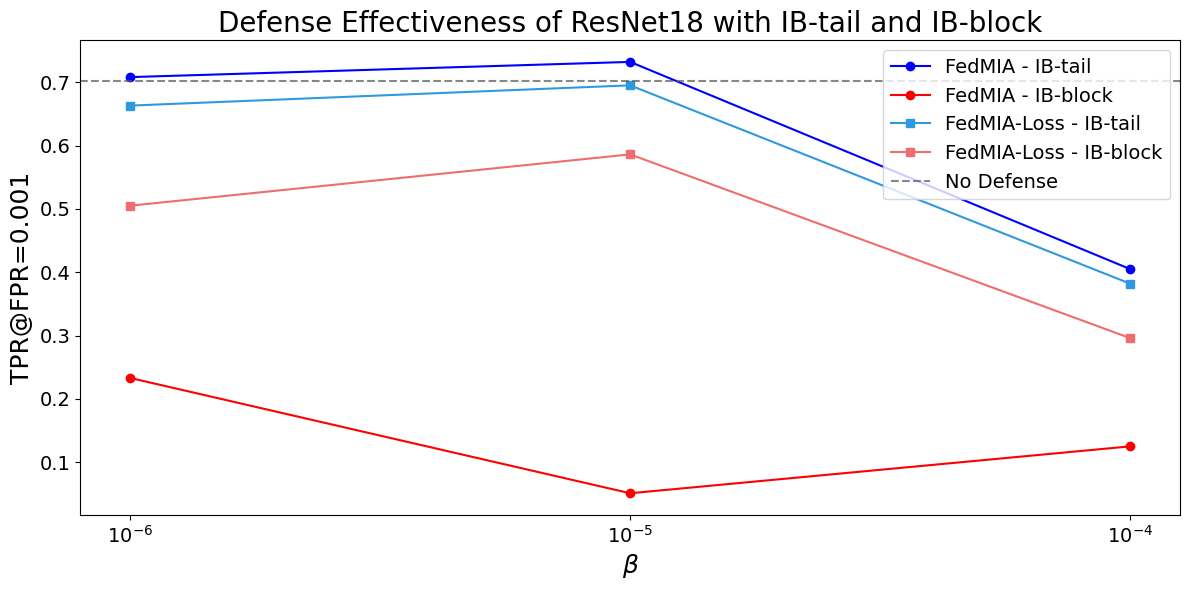

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Data
betas = [r"$10^{-6}$", r"$10^{-5}$", r"$10^{-4}$"]

# IB_tail values
lira_tail = [0.708, 0.732, 0.405]
lira_loss_tail = [0.663, 0.695, 0.382]
acc_tail = [0.501, 0.500, 0.505]

# IB_Block values
lira_block = [0.233, 0.051, 0.125]
lira_loss_block = [0.505, 0.586, 0.296]
acc_block = [0.527, 0.496, 0.406]

blue_gradient = ['b', "#2F99E0"]  # Dark to light blue
red_gradient = ['r', "#ef6d6d"]   # Dark to light red

plt.figure(figsize=(12, 6))
# LIRA and LIRA Loss
plt.plot(betas, lira_tail, marker='o', color=blue_gradient[0], label='FedMIA - IB-tail')
plt.plot(betas, lira_block, marker='o', color=red_gradient[0], label='FedMIA - IB-block')
plt.plot(betas, lira_loss_tail, marker='s', color=blue_gradient[1], label='FedMIA-Loss - IB-tail')
plt.plot(betas, lira_loss_block, marker='s', color=red_gradient[1], label='FedMIA-Loss - IB-block')

plt.axhline(y=0.702, color="#555555", linestyle="--", alpha=0.7, label="No Defense")
# plt.axhline(y=all_mean_top[0], color="#555555", linestyle="--", label=r"$\beta$ = 0")

plt.ylabel('TPR@FPR=0.001', fontsize=18)
plt.yticks(fontsize=14)
plt.xlabel(r"$\beta$", fontsize=18) 
plt.xticks(fontsize=14)
plt.title('Defense Effectiveness of ResNet18 with IB-tail and IB-block', fontsize=20)
plt.legend(loc="upper right", fontsize=14)

plt.savefig('./plot_result/cifar100_block_tail_comparison_FedMIA.png', bbox_inches='tight') 

plt.tight_layout()
plt.show()


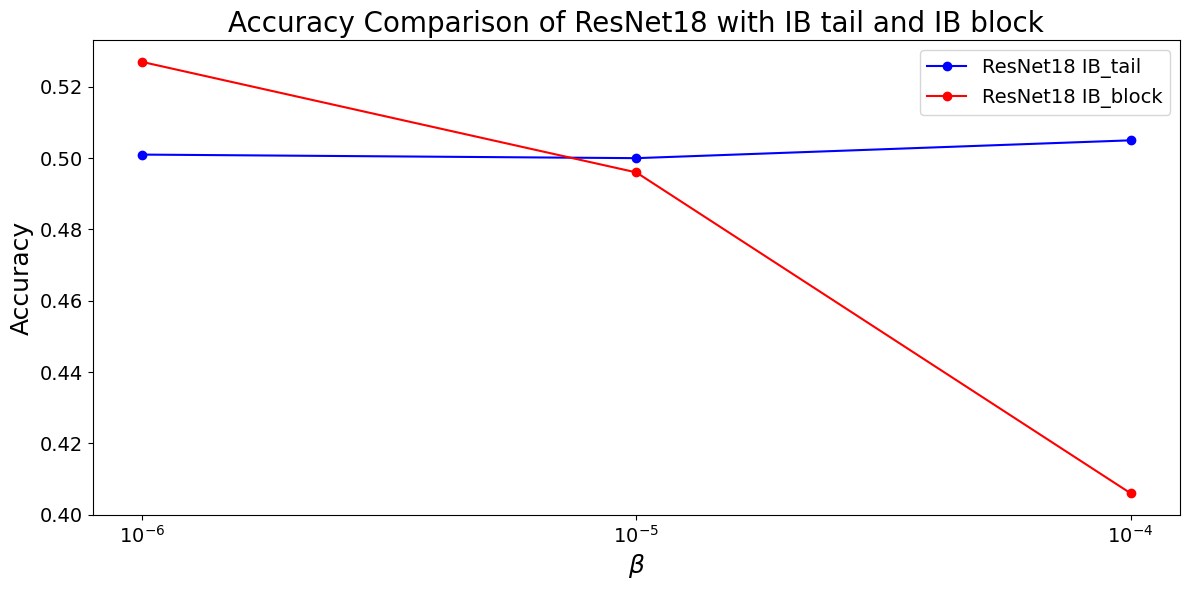

In [100]:
plt.figure(figsize=(12, 6))
# Accuracy
plt.plot(betas, acc_tail, marker='o', color='blue', label='ResNet18 IB_tail')
plt.plot(betas, acc_block, marker='o', color='red', label='ResNet18 IB_block')
plt.ylabel('Accuracy', fontsize=18)
plt.yticks(fontsize=14)
plt.xlabel(r"$\beta$", fontsize=18)
plt.xticks(fontsize=14)
plt.title('Accuracy Comparison of ResNet18 with IB tail and IB block', fontsize=20)
plt.legend(fontsize=14)

plt.savefig('./plot_result/cifar100_block_tail_comparison_accuracy.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

In [107]:
a=[1,2,3]
b=[]
b.extend(a)
print(b)

[1, 2, 3]
